# K Nearest Neighbors

Regina Ceballos Mondragón

147663

In [29]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

## Data for points inside circles

In [2]:
n = 10000
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))
rad = np.resize(np.random.uniform(-2, 2, 8), (8, 1))

In [3]:
def circ(X1, X2, rad):
    if (X1-rad[0])**2 + (X2-rad[1])**2 < 0.25 or (X1-rad[2])**2 + (X2-rad[3])**2 < 0.25:
        return 1.
    else:
        if (X1-rad[4])**2 + (X2-rad[5])**2 < 0.25 or (X1-rad[6])**2 + (X2-rad[7])**2 < 0.25:
            return 1.
        else:
            return 0.

In [4]:
X = np.concatenate((X1, X2), axis = 1)
Y = np.resize([circ(X1[i], X2[i], rad) for i in range(n)], (n,1))

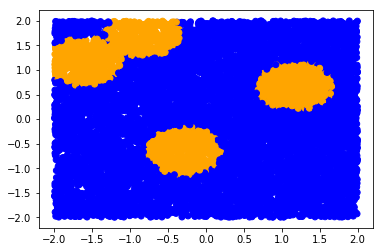

In [21]:
plt.scatter(X1, X2, c =['orange' if i==1 else 'blue' for i in Y])
plt.show()

## SVM training

In [6]:
clf = svm.SVC()
clf.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

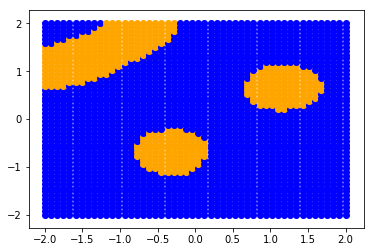

In [22]:
xs = np.linspace(-2, 2)
ys = np.linspace(-2, 2)
pred_classes = []
for i in xs:
    for j in ys:
        a = []
        a.append(i)
        a.append(j)
        pred_class = clf.predict([a])
        pred_classes.append((i, j, np.around(pred_class)))
        plt.scatter(i, j, c = 'orange' if pred_class==1 else 'blue')
plt.show()

## K Nearest Neighbors

In [32]:
nbrs = KNeighborsClassifier(n_neighbors=7)
nbrs.fit(X, Y)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

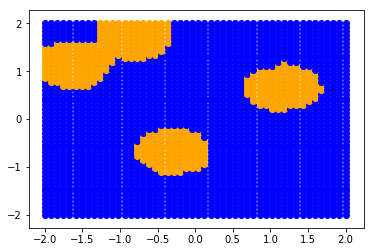

In [33]:
pred_classes = []
for i in xs:
    for j in ys:
        a = []
        a.append(i)
        a.append(j)
        pred_class = nbrs.predict([a])
        pred_classes.append((i, j, np.around(pred_class)))
        plt.scatter(i, j, c = 'orange' if pred_class==1 else 'blue')
plt.show()

It is clear that K Nearest Neighbors works better than SVM for this data.